In [1]:
import xarray as xr 
import matplotlib.pyplot as plt 
import numpy as np 
import matplotlib as mpl 
from matplotlib.ticker import MaxNLocator
rcParams = {'font.size':20}
plt.rcParams.update(rcParams)

In [2]:
folder_std = "/home/peter/EasterIslands/Runs_22May/Standard/"
folders = [folder_std+"FullModel_grid50_gH17e-3_noRegrowth_highFix_linear_NormPop_alphaStd_seed"+str(seed)+"/" for seed in np.arange(1,16)]
stds = [xr.open_dataset(folder+"Statistics.ncdf") for folder in folders]
label_Standard1 = "Standard"
label_Standard = "Standard: High N fixation\n(without tree regrowth)"


In [3]:
folder_delayed = "/home/peter/EasterIslands/Runs_22May/delayed/"
folders = [folder_delayed+"FullModel_grid50_gH17e-3_noRegrowth_highFix_delayed_NormPop_alphaStd_seed"+str(seed)+"/" for seed in np.arange(1,16)]
delayed = [xr.open_dataset(folder+"Statistics.ncdf") for folder in folders]
label_delayed = r"Delayed $T_{\rm Pref}$-Response"

In [4]:
folder_careful= "/home/peter/EasterIslands/Runs_22May/careful/"
folders = [folder_careful+"FullModel_grid50_gH17e-3_noRegrowth_highFix_careful_NormPop_alphaStd_seed"+str(seed)+"/" for seed in np.arange(1,16)]
careful = [xr.open_dataset(folder+"Statistics.ncdf") for folder in folders]
label_careful = r"Early $T_{\rm Pref}$-Response"

In [5]:
folder_logistic = "/home/peter/EasterIslands/Runs_22May/logistic/"
folders = [folder_logistic+"FullModel_grid50_gH17e-3_noRegrowth_highFix_logistic_NormPop_alphaStd_seed"+str(seed)+"/" for seed in np.arange(1,16)]
logistic = [xr.open_dataset(folder+"Statistics.ncdf") for folder in folders]
label_logistic = r"Logistic $T_{\rm Pref}$-Response"

In [6]:
folder_with = "/home/peter/EasterIslands/Runs_22May/with/"
folders = [folder_with+"FullModel_grid50_gH17e-3_withRegrowth_highFix_linear_NormPop_alphaStd_seed"+str(seed)+"/" for seed in np.arange(1,16)]
withs = [xr.open_dataset(folder+"Statistics.ncdf") for folder in folders]
label_with = "High N fixation\n(with tree regrowth)"

In [7]:
folder_low = "/home/peter/EasterIslands/Runs_22May/low/"
folders = [folder_low+"FullModel_grid50_gH17e-3_noRegrowth_lowFix_linear_NormPop_alphaStd_seed"+str(seed)+"/" for seed in np.arange(1,16)]
lows = [xr.open_dataset(folder+"Statistics.ncdf") for folder in folders]
label_low = "Low N fixation\n(without tree regrowth)"

In [8]:
folder_lowwith = "/home/peter/EasterIslands/Runs_22May/lowwith/"
folders = [folder_lowwith+"FullModel_grid50_gH17e-3_withRegrowth_lowFix_linear_NormPop_alphaStd_seed"+str(seed)+"/" for seed in np.arange(1,16)]
lowwiths = [xr.open_dataset(folder+"Statistics.ncdf") for folder in folders]
label_lowwith = "Low N fixation\n(with tree regrowth)"

In [58]:


def plot_stats(ax, title):
    datavals = [1e-3 * datas[k].pop_ct.sum(dim="triangles") for k in range(len(datas))]
    mean = np.mean(datavals, axis=0)
    std = np.std(datavals, axis=0)
    ind = 0; label = r"$\mathbf{pop}(t)$  [$10^3 \, {\rm People}$]  "
    for k in range(len(datas)):
        ax[ind].plot(datas[0].time,  datavals[k], alpha = 0.2, color=colors[ind])
    ax[ind].fill_between(datas[0].time, mean-std,  mean +std, color=colors[ind], alpha=0.3)
    a = ax[ind].plot(datas[0].time, mean, color=colors[ind], lw=3, label=label)#, color=colors[0])
    ax[ind].set_ylabel(label)
    ylimhigh[ind] = 24


    datavals = [(datas[k].T_ct.sum(dim='triangles')*1e-6) for k in range(len(datas))]
    mean = np.mean(datavals, axis=0)
    std = np.std(datavals, axis=0)
    ind = 1; label = r"$\mathbf{T}(t)$  [$10^6\, {\rm Trees}]$"
    for k in range(len(datas)):
        ax[ind].plot(datas[0].time,  datavals[k], alpha = 0.2, color=colors[ind])
    ax[ind].fill_between(datas[0].time, mean-std,  mean +std, color=colors[ind], alpha=0.3)
    b = ax[ind].plot(datas[0].time, mean, color=colors[ind], lw=3, label=label)#, color=colors[0])
    ax[ind].set_ylabel(label)
    ylimhigh[ind] = 16


    datavals=[]
    for j in range(0,len(datas)):
        fireSize = np.zeros(len(datas[0].time))
        t0=datas[0].isel(time=0).time.values
        fireSize[datas[j].firesTime- t0] += datas[j].firesSize
        BINwidth=20
        bins = np.arange(t0, datas[0].isel(time=-1).time+1, step=BINwidth )
        binned_fireSize = [1e-3 * np.sum( fireSize[( bins[k]-t0)  :  (bins[k+1]-t0 )]) for k in range(len(bins[:-1]))]
        #ax[3].bar(bins[:-1], binned_fireSize,color=colors[3], width=BINwidth)#, bins=np.arange(data.time[0],data.time[-1]+1, step=20), alpha=1, color=colors[3])
        #ax[3].set_ylabel("Fires [1000 Trees /"+str(BINwidth)+" yrs]")
        #plt.plot(bins[:-1], binned_fireSize, lw=1, color=colors[3])
        datavals.append(binned_fireSize)
    mean = np.mean(datavals, axis=0)
    std = np.std(datavals, axis=0)
    ind = 2; label = r"Burnt Trees  [$\frac{10^3\, {\rm Trees}}{20\, {\rm yrs}}$]"
    for k in range(len(datas)):
        ax[ind].plot(bins[:-1],  datavals[k], alpha = 0.2, color=colors[ind])
    ax[ind].fill_between(bins[:-1], mean-std,  mean +std, color=colors[ind], alpha=0.3)
    c = ax[ind].plot(bins[:-1], mean, color=colors[ind], lw=3, label=label)#, color=colors[0])
    ax[ind].set_ylabel(label)
    ylimhigh[ind] = 14

    for i,a in enumerate(ax):
        #a.spines["right"].set_position(('axes',1.0))
        a.tick_params(axis="y", colors=colors[i])
        a.spines["right"].set_position(("axes", 1.0+(i)*0.1))
        #a.set_ylabel(["R", "L", "E", "V"][i])
        a.yaxis.label.set_color(colors[i])
        a.set_ylim(0,ylimhigh[i])
        a.yaxis.set_label_position("right")
        a.yaxis.tick_right()
        a.yaxis.set_major_locator(MaxNLocator(integer=True))

    ax[0].set_xlabel(r"Year  [${\rm A.D.}$]")
    ax[0].set_title(title, x=0.01, y=0.8,fontweight="bold", loc='left')
    return 

#for datas, label, folder in zip([stds, careful, delayed, logistic], [label_Standard, label_careful, label_delayed, label_logistic], [...]):
#    #datas = careful
#    plot_stats(ax, label)


/home/peter/EasterIslands/Runs_22May/Standard/
/home/peter/EasterIslands/Runs_22May/with/
/home/peter/EasterIslands/Runs_22May/lowwith/
/home/peter/EasterIslands/Runs_22May/low/


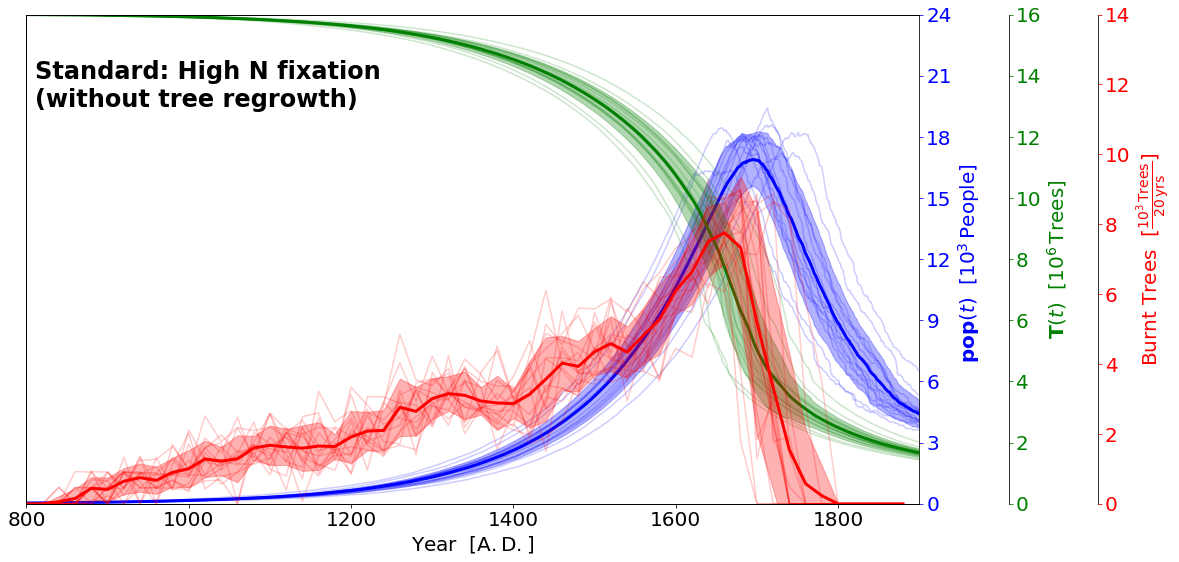

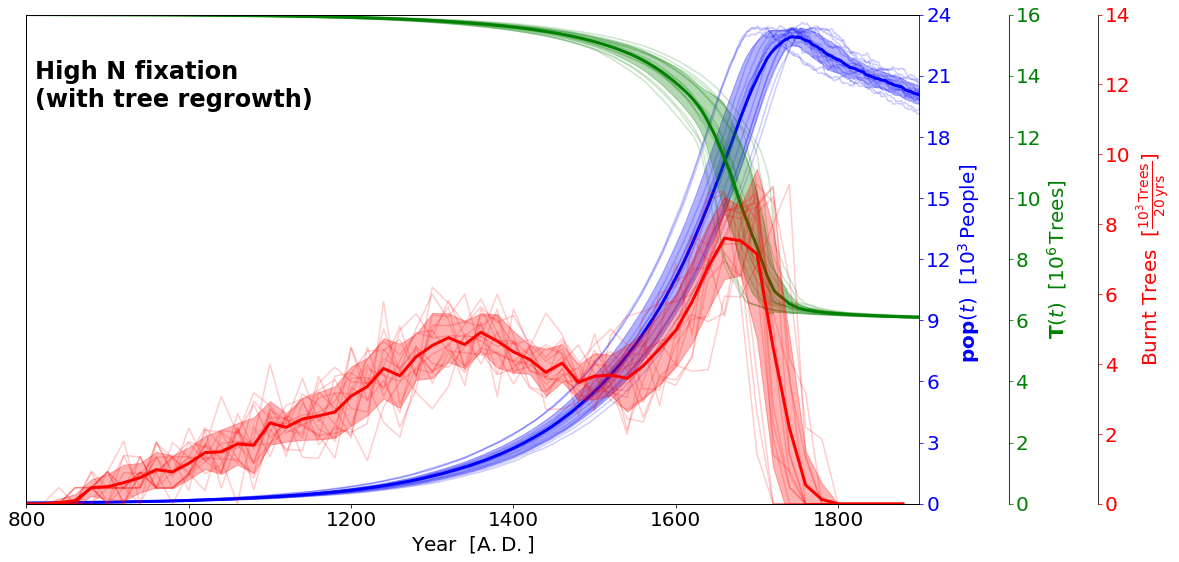

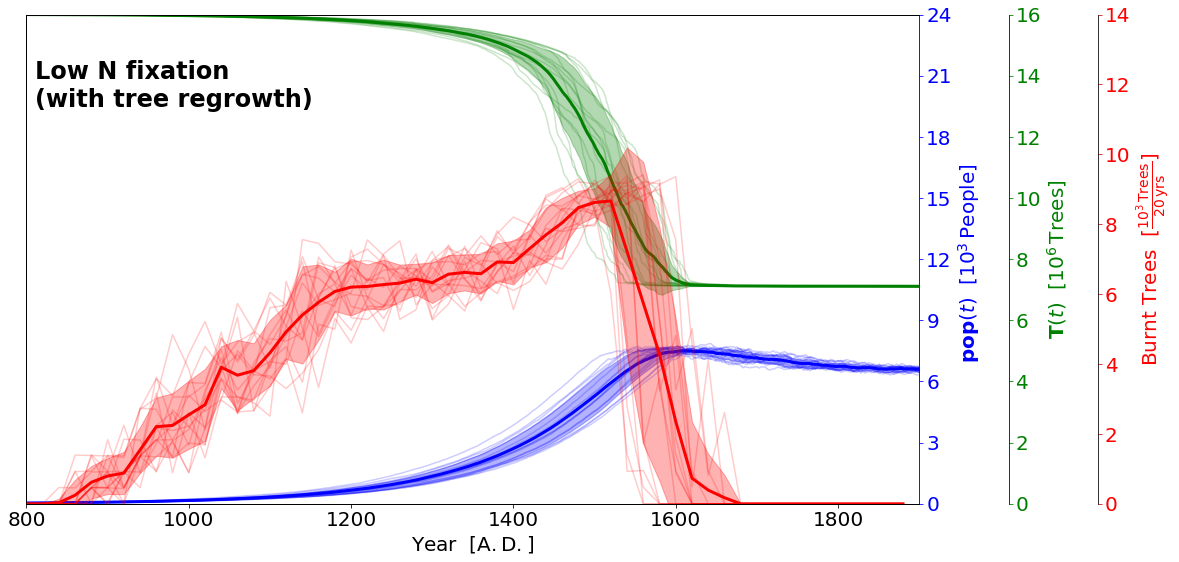

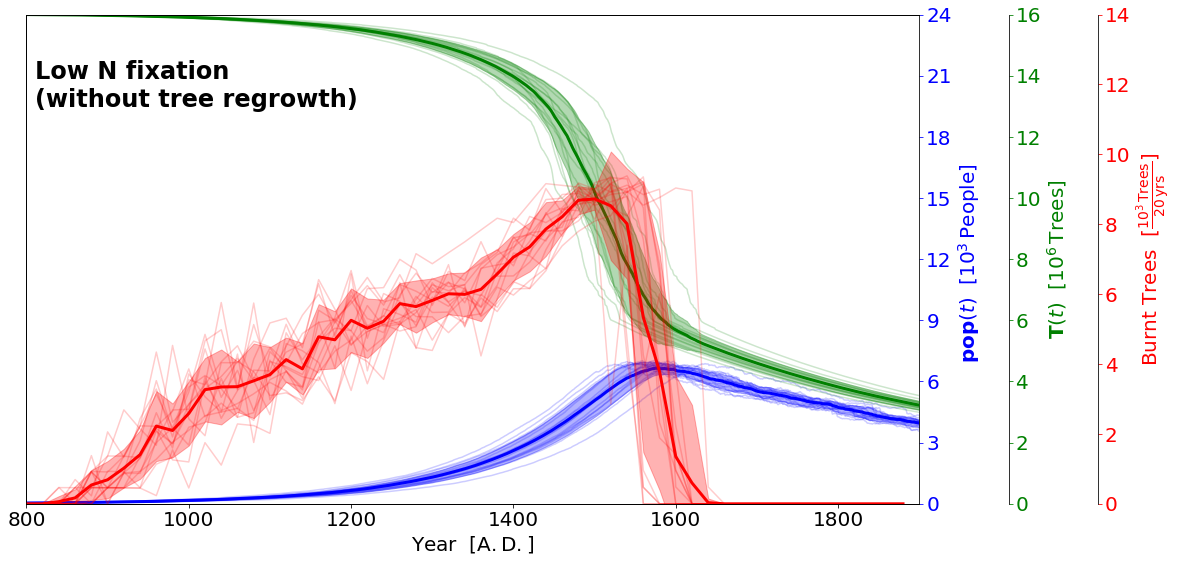

In [24]:
for datas, label, folder in zip([stds, withs, lowwiths, lows], [label_Standard, label_with, label_lowwith, label_low], [folder_std, folder_with, folder_lowwith, folder_low]):
#for datas, label, folder in zip([stds, delayed, careful, logistic], [label_Standard1, label_delayed, label_careful, label_logistic], [folder_std, folder_delayed, folder_careful, folder_logistic]):
    fig =plt.figure(figsize=(16,9))
    colors=["blue", "green", "red"]#, "orange"]
    ax = []
    ax.append(fig.add_subplot(111))
    ax[0].set_xlim(stds[0].time[0], stds[0].time[-1])
    for i in range(2):
        ax.append(ax[0].twinx())
    ylimhigh=[0 for i in range(3)]
    #datas = careful
    plot_stats(ax, label)

    #plt.legend([a,c,b])
    plt.savefig(folder+"EnsembleStatistics.pdf", bbox_inches="tight")
    print(folder)

In [3]:
import numpy as np 
import xarray as xr 
import matplotlib.pyplot as plt 
import observefunc as obs
plt.rcParams.update({"font.size":20})

#folder="/home/peter/EasterIslands/Code/Full_Model/Figs_May11_grid50/FullModel_grid50_repr7e-03_mv100_noRegrowth_highFix_seed101/"
import pickle
import config
from pathlib import Path   # for creating a new directory
datas = stds
filename = "Map/EI_grid"+str(datas[0].gridpoints_y)+"_rad"+str(datas[0].r_T)+"+"+str(datas[0].r_F)+"+"+str(datas[0].r_M_later)
if Path(filename).is_file():
    with open(filename, "rb") as EIfile:
        config.EI = pickle.load(EIfile)

In [15]:
import observefunc as obs
for datas, label, folder in zip([stds, delayed, careful, logistic], [label_Standard1, label_delayed, label_careful, label_logistic], [folder_std, folder_delayed, folder_careful, folder_logistic]):
    _ = obs.observe(1000, fig=None, ax=None, specific_ag_to_follow=None, save=True, data = datas[2], ncdf=True, folder=folder, posSize_small=False, legend=False, cbar=[False, False, False], cbarax=None)
    _ = obs.observe(1500, fig=None, ax=None, specific_ag_to_follow=None, save=True, data = datas[2], ncdf=True, folder=folder, posSize_small=False, legend=False, cbar=[False, False, False], cbarax=None)
    _ = obs.observe(1700, fig=None, ax=None, specific_ag_to_follow=None, save=True, data = datas[2], ncdf=True, folder=folder, posSize_small=False, legend=False, cbar=[False, False, False], cbarax=None)
    _ = obs.observe(1800, fig=None, ax=None, specific_ag_to_follow=None, save=True, data = datas[2], ncdf=True, folder=folder, posSize_small=False, legend=False, cbar=[False, False, False], cbarax=None)


NameError: name 'delayed' is not defined

# T PREF PLOT

0
1


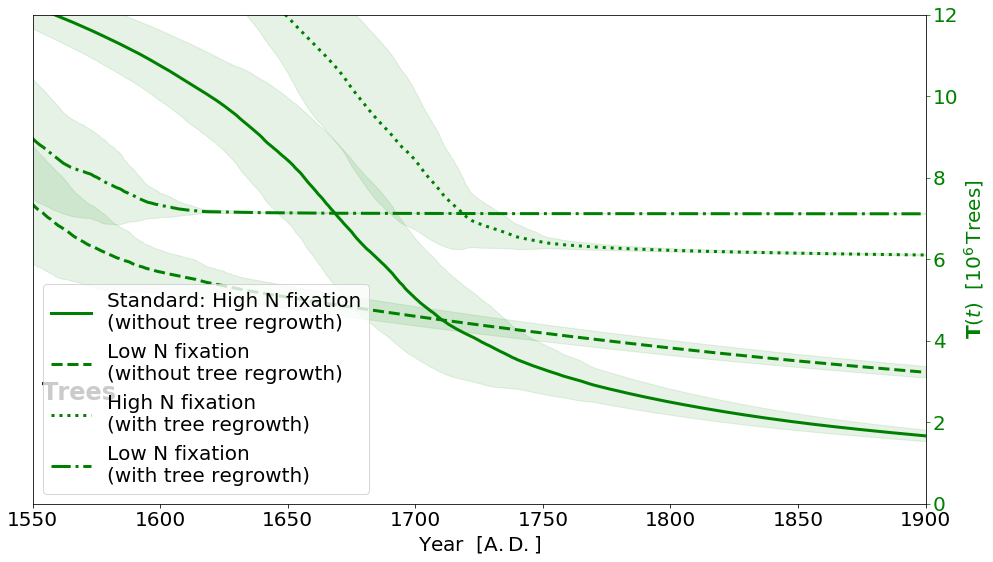

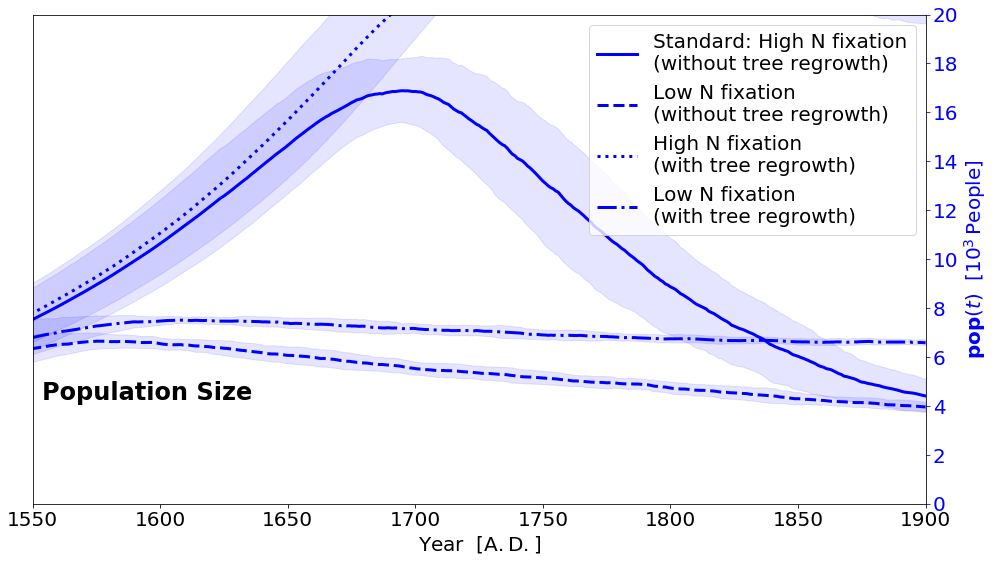

In [11]:
for u in range(2):
    print(u)
    fig =plt.figure(figsize=(16,9))
    rcParams = {'font.size':20}
    plt.rcParams.update(rcParams)
    ax = []
    ax.append(fig.add_subplot(111))
    ax[0].set_xlim(stds[0].time[0], stds[0].time[-1])
    for i in range(0):
        ax.append(ax[0].twinx())
    if u==1:
        color = "blue"
        Title = r"$\mathbf{pop}(t)$  [$10^3 \, {\rm People}$]"
        TitleText = "Population Size"
        ylimhigh = 20


    else:
        Title=r"$\mathbf{T}(t)$  [$10^6\, {\rm Trees}$]"
        TitleText="Trees"
        ylimhigh=12
        color="green"
    styles = ["-", "--", ":", "-."]
    #labels = ["Linear (Standard)", "Delayed", "Early", "Logistic"]
    labels = ["Standard: High N fixation\n(without tree regrowth)", label_low, label_with, label_lowwith]
    #for n,datas in enumerate([stds, delayed, careful, logistic]):
    for n,datas in enumerate([stds, lows, withs, lowwiths]):
        style = styles[n]
        if u==1:
            datavals = [(datas[k].pop_ct.sum(dim='triangles')*1e-3) for k in range(len(datas))]
        if u==0:
            datavals = [(datas[k].T_ct.sum(dim='triangles')*1e-6) for k in range(len(datas))]
            
        mean = np.mean(datavals, axis=0)
        std = np.std(datavals, axis=0)
        ind = 0; 
        #label = r"$\mathbf{T}(t)$  [$10^6\, {\rm Trees}$]"
        label=labels[n]
        #for k in range(5):
        #    ax[ind].plot(datas[0].time,  datavals[k], alpha = 0.2, color=colors[ind])
        ax[ind].fill_between(datas[0].time, mean-std,  mean +std, color=color, alpha=0.1)
        b = ax[ind].plot(datas[0].time, mean, linestyle = style, color=color, lw=3, label=label)#, color=colors[0])
        ax[ind].set_ylabel(Title)



    for i,a in enumerate(ax):
        #a.spines["right"].set_position(('axes',1.0))
        a.tick_params(axis="y", colors=color)
        a.spines["right"].set_position(("axes", 1.0+(i)*0.1))
        #a.set_ylabel(["R", "L", "E", "V"][i])
        a.yaxis.label.set_color(color)
        a.set_ylim(0,ylimhigh)
        a.yaxis.set_label_position("right")
        a.yaxis.tick_right()
        a.yaxis.set_major_locator(MaxNLocator(integer=True))

    ax[0].set_xlabel(r"Year  [${\rm A.D.}$]")
    ax[0].set_title(TitleText, x=0.01, y=0.2,fontweight="bold", loc='left')
    ax[0].set_xlim(datas[0].time.sel(time=1550),datas[0].time.sel(time=1900))
    plt.legend()
    #plt.savefig("TPrefAdaption_"+TitleText+".pdf", bbox_inches="tight")
    plt.savefig("DifferentTheories_"+TitleText+".pdf", bbox_inches="tight")


['4.3$10^{-6}$', '3.3$10^{-6}$', '5.3$10^{-6}$', '4.4$10^{-6}$']


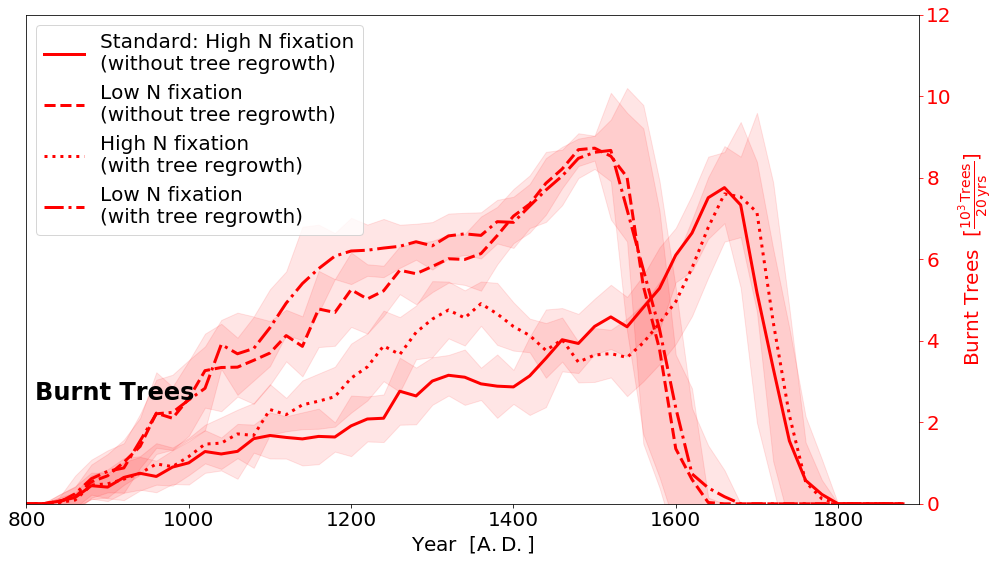

In [12]:
fig =plt.figure(figsize=(16,9))
rcParams = {'font.size':20}
plt.rcParams.update(rcParams)
ax = []
ax.append(fig.add_subplot(111))
ax[0].set_xlim(datas[0].time[0], datas[0].time[-1])
for i in range(0):
    ax.append(ax[0].twinx())

color = "red"
#Title=r"$\mathbf{T}(t)$  [$10^6\, {\rm Trees}$]"
Title =r"Burnt Trees  [$\frac{10^3\, {\rm Trees}}{20\, {\rm yrs}}$]"

TitleText = "Burnt Trees"
ylimhigh = 12


styles = ["-", "--", ":", "-."]
#labels = ["Linear (Standard)", "Delayed", "Early", "Logistic"]
labels = ["Standard: High N fixation\n(without tree regrowth)", label_low, label_with, label_lowwith]
#for n,datas in enumerate([stds, delayed, careful, logistic]):
for n,datas in enumerate([stds, lows, withs, lowwiths]):
    style = styles[n]
    datavals = [(datas[k].T_ct.sum(dim='triangles')*1e-6) for k in range(len(folders))]
    mean = np.mean(datavals, axis=0)
    std = np.std(datavals, axis=0)
    ind = 0; 
    #label = r"$\mathbf{T}(t)$  [$10^6\, {\rm Trees}$]"
    label=labels[n]
  
    datavals=[]
    for j in range(0,len(datas)):
        fireSize = np.zeros(len(datas[0].time))
        t0=datas[0].isel(time=0).time.values
        fireSize[datas[j].firesTime- t0] += datas[j].firesSize
        BINwidth=20
        bins = np.arange(t0, datas[0].isel(time=-1).time+1, step=BINwidth )
        binned_fireSize = [1e-3 * np.sum( fireSize[( bins[k]-t0)  :  (bins[k+1]-t0 )]) for k in range(len(bins[:-1]))]
        #ax[3].bar(bins[:-1], binned_fireSize,color=colors[3], width=BINwidth)#, bins=np.arange(data.time[0],data.time[-1]+1, step=20), alpha=1, color=colors[3])
        #ax[3].set_ylabel("Fires [1000 Trees /"+str(BINwidth)+" yrs]")
        #plt.plot(bins[:-1], binned_fireSize, lw=1, color=colors[3])
        datavals.append(binned_fireSize)
    mean = np.mean(datavals, axis=0)
    std = np.std(datavals, axis=0)

    ax[ind].fill_between(bins[:-1], mean-std,  mean +std, color=color, alpha=0.1)
    c = ax[ind].plot(bins[:-1], mean, linestyle = style, color=color, lw=3, label=label)#, color=colors[0])

    ax[ind].set_ylabel(Title)
for i,a in enumerate(ax):
    #a.spines["right"].set_position(('axes',1.0))
    a.tick_params(axis="y", colors=color)
    a.spines["right"].set_position(("axes", 1.0+(i)*0.1))
    #a.set_ylabel(["R", "L", "E", "V"][i])
    a.yaxis.label.set_color(color)
    a.set_ylim(0,ylimhigh)
    a.yaxis.set_label_position("right")
    a.yaxis.tick_right()
    a.yaxis.set_major_locator(MaxNLocator(integer=True))

ax[0].set_xlabel(r"Year  [${\rm A.D.}$]")
ax[0].set_title(TitleText, x=0.01, y=0.2,fontweight="bold", loc='left')
#ax[0].set_xlim(datas[0].time.sel(time=1600),datas[0].time.sel(time=))
plt.legend(loc="upper left")

TotalBurntTrees=[]
for datas in [stds, delayed, careful, logistic]:
    TotalBurntTrees.append( np.mean([datas[k].firesSize.sum() for k in range(15)]))
Texts = ["%.1f" % (TotalBurntTrees[k]*1e-6)+r"$10^{-6}$" for k in range(4)]
print(Texts)
#plt.savefig("TPrefAdaption_BurntTrees.pdf", bbox_inches="tight")
plt.savefig("DifferentTheories_BurntTrees.pdf", bbox_inches="tight")



In [14]:
TotalBurntTrees=[]
for datas in [stds, lows, withs, lowwiths]:
    TotalBurntTrees.append( np.mean([datas[k].firesSize.sum() for k in range(15)]))
Texts = ["%.1f" % (TotalBurntTrees[k]*1e-6)+r"$10^{-6}$" for k in range(4)]
print(Texts)

['4.3$10^{-6}$', '6.9$10^{-6}$', '5.8$10^{-6}$', '7.7$10^{-6}$']


['4.2', '3.2', '5.2', '4.5']

# Population Growth

In [11]:
len(stds)

25

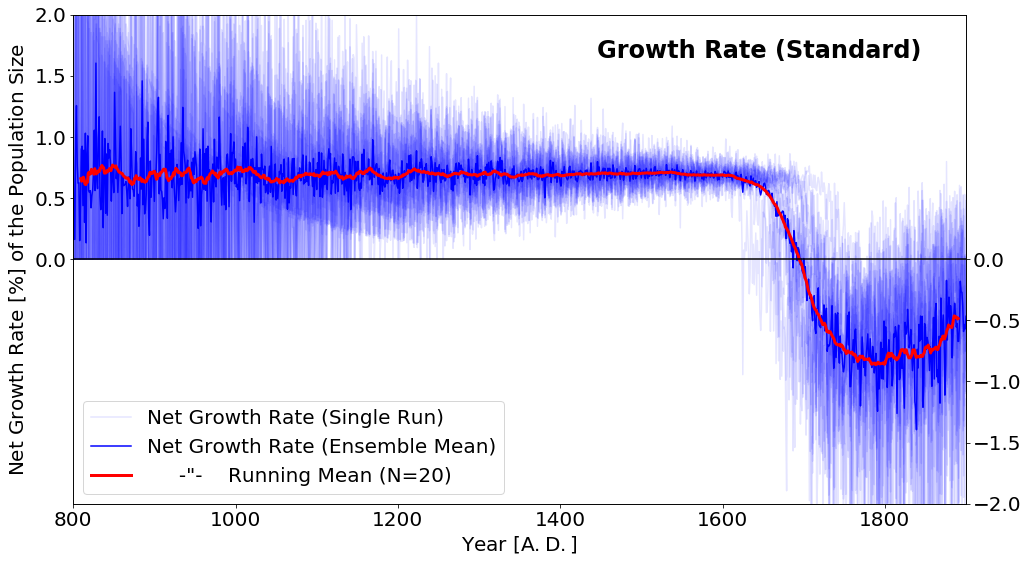

In [6]:
k = 2
#folder= folder_hopping
#label="Moving $\sim$ `Trial&Error Hopping'"
#datas = hopping
folder = folder_std
label=label_Standard1
datas=stds
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111)
netgrowths = [100*(datas[k].total_excessbirths- datas[k].total_excessdeaths)/datas[k].pop_ct.sum(dim="triangles") for k in range(15) ]

#ax.fill_between(stds[0].time, np.mean(netgrowths, axis=0)- np.std(netgrowths, axis=0), np.mean(netgrowths, axis=0)+ np.std(netgrowths, axis=0), alpha=0.2, color="blue")


N = 20
for a in netgrowths:
    ax.plot(stds[0].time, a, alpha = 0.1, color="blue")
ax.plot([], [], alpha = 0.1, color="blue", label="Net Growth Rate (Single Run)")

x = np.mean(netgrowths, axis=0)
ax.plot(stds[0].time, x, alpha = 1, color="blue", label="Net Growth Rate (Ensemble Mean)")
ax.plot(np.convolve(stds[0].time, np.ones((N,))/N, mode='valid'),np.convolve(x, np.ones((N,))/N, mode='valid'), lw=3, label='     -"-    Running Mean (N=20)', color="red")
ax.set_xlabel(r"Year [${\rm A.D.}$]")
ax.set_ylabel(r"Net Growth Rate [$\%$] of the Population Size")
ax.set_ylim(-2, 2)
plt.legend(loc="lower left")
ax.set_title("Growth Rate ("+label+")", x=0.95, y=0.9,fontweight="bold", loc='right')
ax2=ax.twinx()
ax2.set_yticks([-2, -1.5, -1, -0.5, 0])
ax2.set_ylim(-2,2)
ax.set_yticks([0, 0.5, 1.0,1.5, 2.0])
ax.axhline(0,0,1, color="black")
ax.set_xlim(800,1900)
plt.savefig(folder +    "NetGrowthRate.pdf", bbox_inches = "tight")

In [69]:
np.convolve(stds[0].time, np.ones((N,))/N, mode='valid')[np.argmin(np.abs(np.convolve(x, np.ones((N,))/N, mode='valid')))]

1720.5

# SECONDARY STATS 1 NOT USED

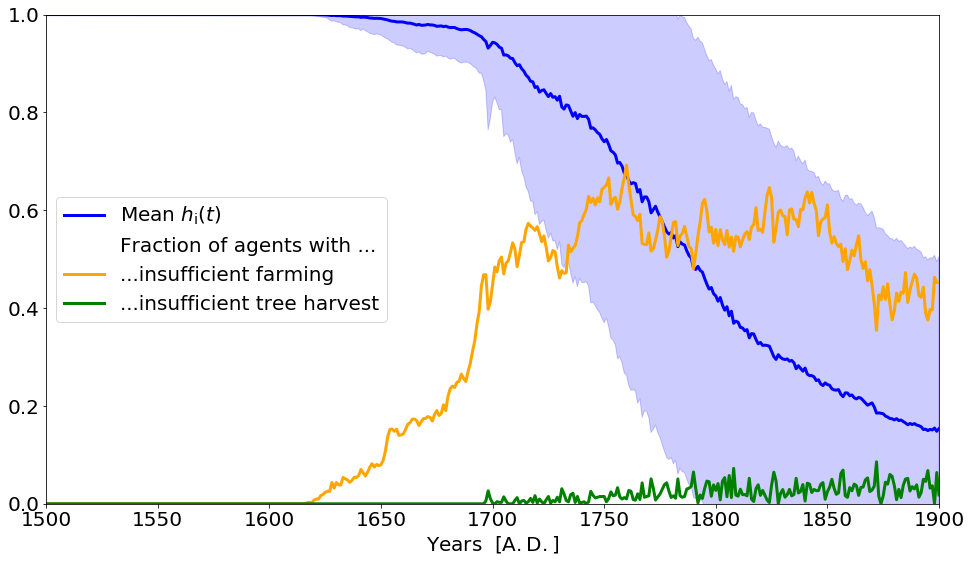

In [56]:
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111)

ax.fill_between(datas[0].time, datas[0].happyMeans-datas[0].happyStd,datas[0].happyMeans+datas[0].happyStd, color="blue", alpha=0.2)
ax.plot(datas[0].time, datas[0].happyMeans, lw=3, color="blue", label=r"Mean $h_{\rm i}(t)$")
ax.plot([],[], color="white", label = "Fraction of agents with ...")
ax.plot(datas[0].time, datas[0].farmingFills, lw=3, color="orange", label="...insufficient farming")
ax.plot(datas[0].time, datas[0].treeFills, lw=3, color='green', label="...insufficient tree harvest")
ax.set_xlim(datas[0].time.sel(time=1500), datas[0].time[-1])
ax.set_ylim(0,1)
ax.set_xlabel(r"Years  $[{\rm A.D.}]$")
plt.legend(loc="center left")


# SECONDARY STATS USED

In [22]:
datas[k]

<xarray.Dataset>
Dimensions:             (2d: 2, index: 2504, time: 1101, triangles: 2768)
Coordinates:
  * 2d                  (2d) object 'x' 'y'
  * time                (time) int64 800 801 802 803 804 ... 1897 1898 1899 1900
  * triangles           (triangles) int64 0 1 2 3 4 ... 2763 2764 2765 2766 2767
  * index               (index) int64 0 1 2 3 4 5 ... 2499 2500 2501 2502 2503
Data variables:
    pop_ct              (triangles, time) int32 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0
    TreePrefAgents      (index, time) float64 0.7999 0.7998 ... nan 0.5362
    T_ct                (triangles, time) int32 6880 6880 6880 6880 ... 0 0 0 0
    GardenFraction      (time) float64 0.0 0.0 0.0 0.0 ... 0.3953 0.3932 0.3909
    TreePopup           (time) float64 0.0 0.0 0.0 ... 2.579e+03 2.579e+03
    Fraction_eroded     (time) float64 0.0 0.06568 0.06568 ... inf inf inf
    Nr_Moves            (time) float64 0.0 0.0 0.0 0.0 ... 11.0 12.0 9.0 15.0
    treeFills           (time) float64 0.0 0.0 0.0 .

In [28]:
config.EI.A_acres_c.sum()

19138

Standard: High N fixation
(without tree regrowth) <xarray.DataArray 'F_ct' ()>
array(0.97006)
Low N fixation
(without tree regrowth) <xarray.DataArray 'F_ct' ()>
array(0.997387)
High N fixation
(with tree regrowth) <xarray.DataArray 'F_ct' ()>
array(1.)
Low N fixation
(with tree regrowth) <xarray.DataArray 'F_ct' ()>
array(1.)


(0.9, 1.0)

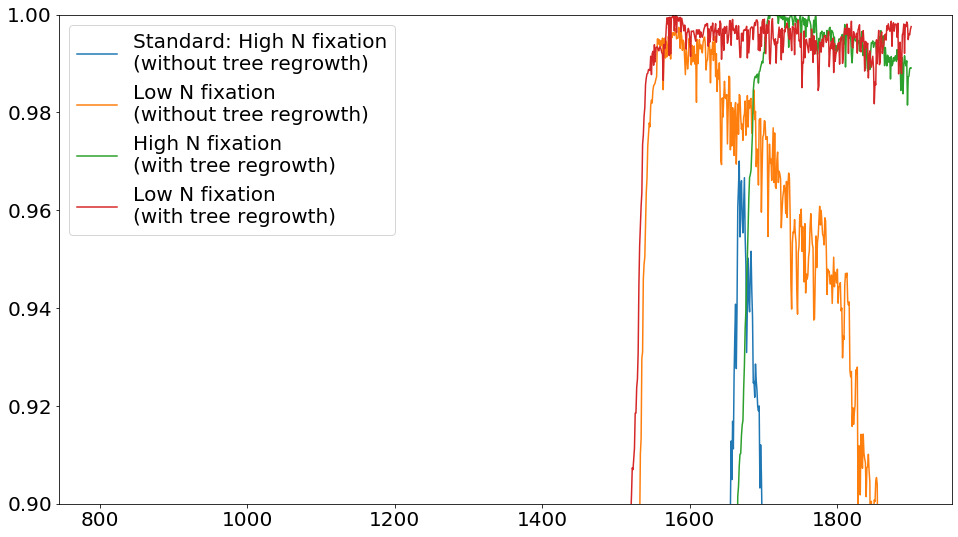

In [42]:
fig=plt.figure(figsize=(16,9))
for datas, label in zip([stds, lows, withs, lowwiths], [label_Standard, label_low, label_with, label_lowwith]):
    
    plt.plot(datas[k].time, datas[k].F_ct.sum(dim="triangles")/config.EI.A_acres_c.sum(), label=label)
    print(label, np.max(datas[k].F_ct.sum(dim="triangles"))/config.EI.A_acres_c.sum())
plt.legend()
plt.ylim(0.9,1.0)

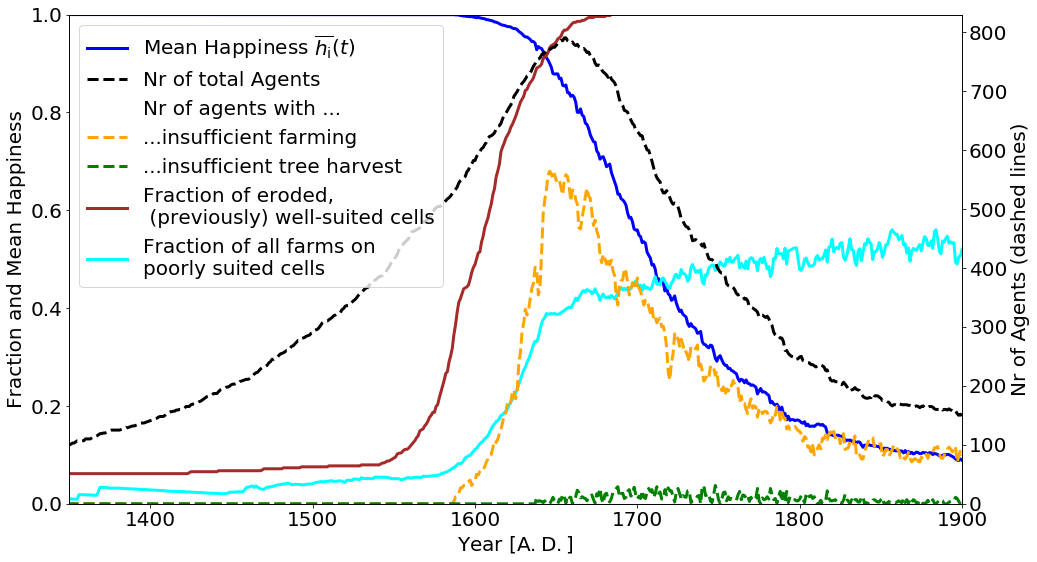

In [5]:
fig = plt.figure(figsize=(16,9))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
k = 12
datas = stds
label = label_Standard1
Nr_agents = datas[k].TreePrefAgents.count(dim = "index")

#ax1.fill_between(datas[k].time, datas[k].happyMeans-datas[k].happyStd,datas[k].happyMeans+datas[k].happyStd, color="blue", alpha=0.1)
a, = ax1.plot(datas[k].time, datas[k].happyMeans, lw=3, color="blue", label=r"Mean Happiness $\overline{h_{\rm i}}(t)$")
b00, = ax2.plot(datas[k].time, Nr_agents, "--", lw=3, color="black", label=r"Nr of total Agents")
b0, = ax2.plot([],[], color="white", label = "Nr of agents with ...")
b, = ax2.plot(datas[k].time, datas[k].farmingFills* Nr_agents, "--", lw=3, color="orange", label="...insufficient farming")
c, = ax2.plot(datas[k].time, datas[k].treeFills * Nr_agents, "--", lw=3, color='green', label="...insufficient tree harvest")
#d, = ax2.plot(datas[k].time, datas[k].Nr_Moves, lw=3, color='gray', label="Nr of agents moving")
Fprime = datas[k].Fraction_eroded
e, = ax1.plot(datas[k].time, Fprime/(1+Fprime), lw=3, color="brown", label="Fraction of eroded, \n (previously) well-suited cells")
f, = ax1.plot(datas[k].time, datas[k].GardenFraction, lw=3, color="cyan", label="Fraction of all farms on \npoorly suited cells")
ax1.set_xlim(datas[k].time.sel(time=1350), datas[k].time[-1])
ax1.set_ylim(0,1)
ax2.set_ylim(0,)
ax2.set_ylabel("Nr of Agents (dashed lines)")
ax1.set_ylabel(r"Fraction and Mean Happiness")
ax1.set_xlabel(r"Year $[{\rm A.D.}]$")
plots = [a,b00,b0,b,c, e, f]
plt.legend(plots, [x.get_label() for x in plots], loc="upper left")
plt.savefig(label+"secondaryStats.pdf", bbox_inches="tight")

# TREE PREF

In [62]:
colors= np.array([
    (27,158,119),
    (217,95,2),
    (117,112,179),
    (231,41,138)
])/255
styles = ["-", "--", ":", "-."]
labels = ["Linear (Standard)", "Delayed", "Early", "Logistic"]
labels = [label_Standard, label_low, label_with, label_lowwith]

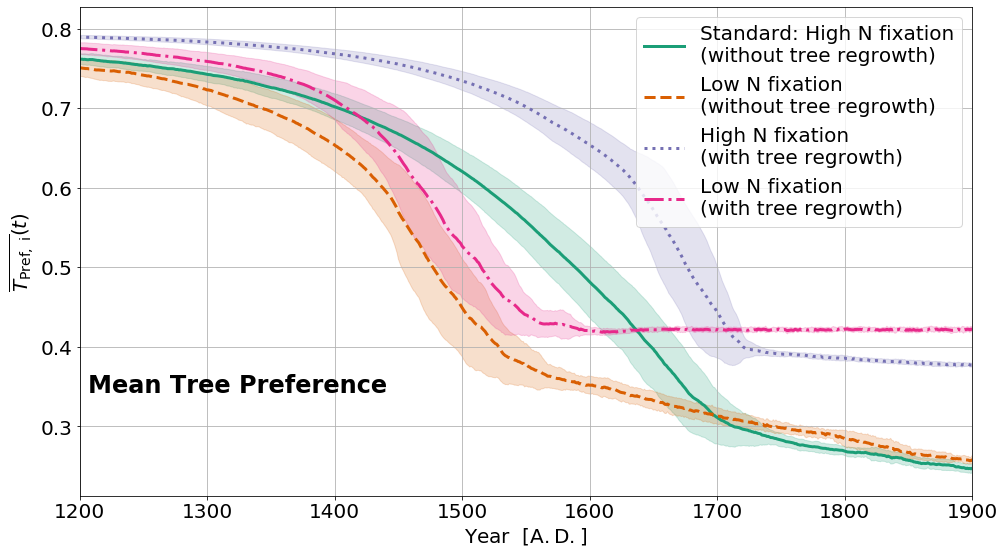

In [64]:
fig=plt.figure(figsize=(16,9))
ax = fig.add_subplot(111)

#for n, datas, label in zip(np.arange(4), [stds, delayed, careful, logistic], labels):
for n, datas, label in zip(np.arange(4), [stds, lows, withs, lowwiths], labels):
    TPrefs = [datas[j].TreePrefAgents.mean(dim="index") for j in range(15)]
    m = np.mean(TPrefs, axis=0)
    s = np.std(TPrefs, axis=0)
    ax.fill_between(stds[0].time, m-s, m+s, color=colors[n], alpha=0.2)
    ax.plot(stds[0].time, m, linestyle = styles[n], lw=3, label=label, color=colors[n])

ax.set_xlabel(r"Year  [${\rm A.D.}$]")
ax.set_ylabel(r"$\overline{T_{\rm Pref, \ i}}(t)$")
ax.set_title("Mean Tree Preference", x=0.01, y=0.2,fontweight="bold", loc='left')
#ax[0].set_xlim(datas[0].time.sel(time=1600),datas[0].time.sel(time=))
plt.legend(loc="upper right")
ax.set_xlim(1200, 1900)
ax.grid()
plt.savefig("Alltheories_TPref.pdf", bbox_inches="tight")


# Happy TPREF

In [37]:
delayedhappy= [delayed[j].happyMeans for j in range(15)]
standardhappy= [stds[j].happyMeans for j in range(15)]
carefulhappy = [careful[j].happyMeans for j in range(15)]
logistichappy = [logistic[j].happyMeans for j in range(15)]

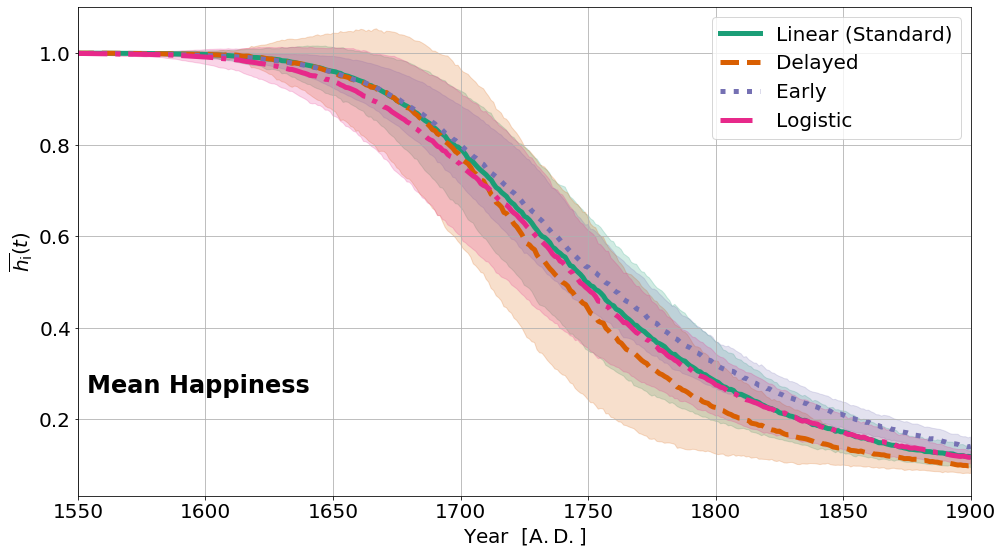

In [38]:
fig=plt.figure(figsize=(16,9))
ax = fig.add_subplot(111)
m = np.mean(standardhappy, axis=0)
s = np.std(standardhappy, axis=0)
ax.fill_between(stds[0].time, m-s, m+s, color=colors[0], alpha=0.2)
ax.plot(stds[0].time, m, linestyle = styles[0], lw=5, label="Linear (Standard)", color=colors[0])
m = np.mean(delayedhappy, axis=0)
s = np.std(delayedhappy, axis=0)
ax.fill_between(stds[0].time, m-s, m+s, color=colors[1], alpha=0.2)
ax.plot(stds[0].time, m, linestyle = styles[1], lw=5, color=colors[1], label="Delayed")
m = np.mean(carefulhappy, axis=0)
s = np.std(carefulhappy, axis=0)
ax.fill_between(stds[0].time, m-s, m+s, color=colors[2], alpha=0.2)
ax.plot(stds[0].time, m, linestyle = styles[2], color=colors[2], lw=5, label="Early")
m = np.mean(logistichappy, axis=0)
s = np.std(logistichappy, axis=0)
ax.fill_between(stds[0].time, m-s, m+s, color=colors[3], alpha=0.2)
ax.plot(stds[0].time, m, linestyle = styles[3], lw=5, color=colors[3], label="Logistic")
ax.set_xlabel(r"Year  [${\rm A.D.}$]")
ax.set_ylabel(r"$\overline{h_{\rm i}}(t)$")
ax.set_title("Mean Happiness", x=0.01, y=0.2,fontweight="bold", loc='left')
#ax[0].set_xlim(datas[0].time.sel(time=1600),datas[0].time.sel(time=))
plt.legend(loc="upper right")
ax.set_xlim(1600, 1900)
ax.grid()
plt.savefig("TPrefAdaption_Happy.pdf", bbox_inches="tight")


# ALPHA 

In [65]:
folder_deterministic = "/home/peter/EasterIslands/Runs_22May/alphaDeterministic/"
folders = [folder_deterministic+"FullModel_grid50_gH17e-3_noRegrowth_highFix_linear_NormPop_alphaDeterministic_seed"+str(seed)+"/" for seed in np.arange(1,16)]
deterministic = [xr.open_dataset(folder+"Statistics.ncdf") for folder in folders]
label_deterministic = r"Moving `Optimal Location'"

In [66]:
folder_resource = "/home/peter/EasterIslands/Runs_22May/alphaResource/"
folders = [folder_resource+"FullModel_grid50_gH17e-3_noRegrowth_highFix_linear_NormPop_alphaResource_seed"+str(seed)+"/" for seed in np.arange(1,16)]
resource = [xr.open_dataset(folder+"Statistics.ncdf") for folder in folders]
label_Resource = r"Moving `Only Resources'"

In [67]:
folder_hopping = "/home/peter/EasterIslands/Runs_22May/alphaHopping/"
folders = [folder_hopping+"FullModel_grid50_gH17e-3_noRegrowth_highFix_linear_NormPop_alphaHopping_seed"+str(seed)+"/" for seed in np.arange(1,16)]
hopping = [xr.open_dataset(folder+"Statistics.ncdf") for folder in folders]
label_hopping = r"Moving `Trial\&Error Hopping'"

In [42]:
datas, label, folder = [deterministic,label_deterministic,folder_deterministic]
for datas, label, folder in zip([stds, deterministic, hopping, resource], [label_Standard1, label_deterministic, label_hopping, label_Resource], [folder_std, folder_deterministic, folder_hopping, folder_resource]):
    fig =plt.figure(figsize=(16,9))
    colors=["blue", "green", "red"]#, "orange"]
    ax = []
    ax.append(fig.add_subplot(111))
    ax[0].set_xlim(stds[0].time[0], stds[0].time[-1])
    for i in range(2):
        ax.append(ax[0].twinx())
    ylimhigh=[0 for i in range(3)]
    #datas = careful
    plot_stats(ax, label)

    #plt.legend([a,c,b])
    plt.savefig(folder+"EnsembleStatistics.pdf", bbox_inches="tight")
    plt.close()
    print(folder)
    _ = obs.observe(1000, fig=None, ax=None, specific_ag_to_follow=None, save=True, data = datas[2], ncdf=True, folder=folder, posSize_small=False, legend=False, cbar=[False, False, False], cbarax=None)
    _ = obs.observe(1500, fig=None, ax=None, specific_ag_to_follow=None, save=True, data = datas[2], ncdf=True, folder=folder, posSize_small=False, legend=False, cbar=[False, False, False], cbarax=None)
    _ = obs.observe(1700, fig=None, ax=None, specific_ag_to_follow=None, save=True, data = datas[2], ncdf=True, folder=folder, posSize_small=False, legend=False, cbar=[False, False, False], cbarax=None)
    _ = obs.observe(1800, fig=None, ax=None, specific_ag_to_follow=None, save=True, data = datas[2], ncdf=True, folder=folder, posSize_small=False, legend=False, cbar=[False, False, False], cbarax=None)

/home/peter/EasterIslands/Runs_22May/Standard/
/home/peter/EasterIslands/Runs_22May/alphaDeterministic/
/home/peter/EasterIslands/Runs_22May/alphaHopping/
/home/peter/EasterIslands/Runs_22May/alphaResource/


# TREQ, R_T

In [8]:
folder_largeRad= "/home/peter/EasterIslands/Runs_22May/largeRad/"
folders = [folder_largeRad+"FullModel_grid50_gH17e-3_noRegrowth_highFix_linear_NormPop_alphaStd_seed"+str(seed)+"/" for seed in np.arange(1,16)]
largeRad = [xr.open_dataset(folder+"Statistics.ncdf") for folder in folders]
label_largeRad = r"Larger Resource Search Radii"

In [9]:
folder_smallRad= "/home/peter/EasterIslands/Runs_22May/smallRad/"
folders = [folder_smallRad+"FullModel_grid50_gH17e-3_noRegrowth_highFix_linear_NormPop_alphaStd_seed"+str(seed)+"/" for seed in np.arange(1,16)]
smallRad = [xr.open_dataset(folder+"Statistics.ncdf") for folder in folders]
label_smallRad = r"Smaller Resource Search Radii"

In [10]:
folder_LargeTReq= "/home/peter/EasterIslands/Runs_22May/LargeTReq/"
folders = [folder_LargeTReq+"FullModel_grid50_gH17e-3_noRegrowth_highFix_linear_NormPop_alphaStd_seed"+str(seed)+"/" for seed in np.arange(1,16)]
LargeTReq = [xr.open_dataset(folder+"Statistics.ncdf") for folder in folders]
label_LargeTReq = r"Large $T_{\rm Req, \ pP}$"

In [11]:
for datas, label, folder in zip([smallRad,largeRad, LargeTReq], [label_smallRad, label_largeRad,label_LargeTReq], [folder_smallRad, folder_largeRad, folder_LargeTReq]):
    fig =plt.figure(figsize=(16,9))
    colors=["blue", "green", "red"]#, "orange"]
    ax = []
    ax.append(fig.add_subplot(111))
    ax[0].set_xlim(stds[0].time[0], stds[0].time[-1])
    for i in range(2):
        ax.append(ax[0].twinx())
    ylimhigh=[0 for i in range(3)]
    #datas = careful
    plot_stats(ax, label)

    #plt.legend([a,c,b])
    plt.savefig(folder+"EnsembleStatistics.pdf", bbox_inches="tight")
    plt.close()
    print(folder)
    _ = obs.observe(1000, fig=None, ax=None, specific_ag_to_follow=None, save=True, data = datas[2], ncdf=True, folder=folder, posSize_small=False, legend=False, cbar=[False, False, False], cbarax=None)
    _ = obs.observe(1500, fig=None, ax=None, specific_ag_to_follow=None, save=True, data = datas[2], ncdf=True, folder=folder, posSize_small=False, legend=False, cbar=[False, False, False], cbarax=None)
    _ = obs.observe(1700, fig=None, ax=None, specific_ag_to_follow=None, save=True, data = datas[2], ncdf=True, folder=folder, posSize_small=False, legend=False, cbar=[False, False, False], cbarax=None)
    _ = obs.observe(1800, fig=None, ax=None, specific_ag_to_follow=None, save=True, data = datas[2], ncdf=True, folder=folder, posSize_small=False, legend=False, cbar=[False, False, False], cbarax=None)

/home/peter/EasterIslands/Runs_22May/smallRad/
/home/peter/EasterIslands/Runs_22May/largeRad/
/home/peter/EasterIslands/Runs_22May/LargeTReq/


# Less Res Pop

In [54]:
folder_lessrespop= "/home/peter/EasterIslands/Runs_22May/LessResPop/"
folders = [folder_lessrespop+"FullModel_grid50_gH17e-3_noRegrowth_highFix_linear_LessResPop_alphaStd_seed"+str(seed)+"/" for seed in np.arange(1,16)]
lessrespop = [xr.open_dataset(folder+"Statistics.ncdf") for folder in folders]
label_lessrespop = r"Less Resilient Population"

In [55]:
folder_withlessrespop= "/home/peter/EasterIslands/Runs_22May/WithLessResPop/"
folders = [folder_withlessrespop+"FullModel_grid50_gH17e-3_withRegrowth_highFix_linear_LessResPop_alphaStd_seed"+str(seed)+"/" for seed in np.arange(1,16)]
withlessrespop = [xr.open_dataset(folder+"Statistics.ncdf") for folder in folders]
label_withlessrespop = r"Less Resilient Population\n(with tree regrowth)"

In [60]:
datas = withlessrespop
label = label_withlessrespop
folder = folder_withlessrespop
fig =plt.figure(figsize=(16,9))
colors=["blue", "green", "red"]#, "orange"]
ax = []
ax.append(fig.add_subplot(111))
ax[0].set_xlim(stds[0].time[0], stds[0].time[-1])
for i in range(2):
    ax.append(ax[0].twinx())
ylimhigh=[0 for i in range(3)]
#datas = careful
plot_stats(ax, label)

#plt.legend([a,c,b])
plt.savefig(folder+"EnsembleStatistics.pdf", bbox_inches="tight")
plt.close()
print(folder)
_ = obs.observe(1000, fig=None, ax=None, specific_ag_to_follow=None, save=True, data = datas[2], ncdf=True, folder=folder, posSize_small=False, legend=False, cbar=[False, False, False], cbarax=None)
_ = obs.observe(1500, fig=None, ax=None, specific_ag_to_follow=None, save=True, data = datas[2], ncdf=True, folder=folder, posSize_small=False, legend=False, cbar=[False, False, False], cbarax=None)
_ = obs.observe(1700, fig=None, ax=None, specific_ag_to_follow=None, save=True, data = datas[2], ncdf=True, folder=folder, posSize_small=False, legend=False, cbar=[False, False, False], cbarax=None)
_ = obs.observe(1800, fig=None, ax=None, specific_ag_to_follow=None, save=True, data = datas[2], ncdf=True, folder=folder, posSize_small=False, legend=False, cbar=[False, False, False], cbarax=None)

/home/peter/EasterIslands/Runs_22May/WithLessResPop/


In [47]:
lessrespop[0].g_shape

3